## Image Segmentation

NAME: Pinheng Chen 

zID:  z5383372

### Materials:
Mean Shift Clustering:
http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/

### Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from statistics import mean
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift
from skimage.color import rgb2gray
# Required to calculate Dice Similarity Coefficient


from PIL import Image


# Reduce size of original image to reduce computation time
size = 100, 100# change here

#### Function for displaying images

In [2]:
def plot_two_images(figure_title, image1, label1, image2, label2, 
                    cmap1=None, cmap2=None):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(image1, cmap = cmap1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 2, 2)
    plt.imshow(image2, cmap = cmap2)
    plt.axis('off')
    plt.title(label2)

    plt.show()

#### Function for applying MeanShift algorithm

In [3]:
def apply_meanshift(img):
    
    # TODO: Apply MeanShift to image
    # Consider the following hints as per the lab specification

    # Step 1 - Extract the three RGB colour channels
#     img_tmp = img.copy()
    print('processing meanshift')
    img_array = np.array(img)
    img_copy = img_array.copy()
    r = img_copy[:,:,0]
    g = img_copy[:,:,1]
    b = img_copy[:,:,2]
#     colour_samples = np.reshape(img_array, [-1,3])
    
    # Step 2 - Store original image shape to be used later in resizing
    # Combine the three colour channels by flattening each channel
    # Then stack the flattened channels together
    # This gives the "colour_samples"
    original_shape = img_array.shape
    red_flat = r.flatten()
    green_flat = g.flatten()
    blue_flat = b.flatten()
    colour_samples = np.stack((red_flat, green_flat, blue_flat), axis=-1)

    # Step 3 - Perform MeanShift clustering
    # For larger images this may take a few minutes to compute
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    # Step 4 - Reshape ms_labels back to the original image shape
    # for displaying the segmentation output
    ms_labels = ms_labels.reshape((original_shape[:2]))
    
    return ms_labels

#### Function for applying Watershed algorithm

In [4]:
def apply_watershed(img, threshold=None, plotDistTransform = False, ismask = False):
    
    # TODO: Apply Watershed to image
    # Consider the following hints as per the lab specification
    print("processing watershed")
    # Convert to binary image (note: can also use cv thresholding)
    img_grey = img.convert('L')
    if threshold is not None:
        if ismask == True:
            img_grey = img_grey.point(lambda x: 0 if x < threshold else 255, '1')
        else:
            img_grey = img_grey.point(lambda x: 255 if x < threshold else 0, '1')

    # Step 1 - Convert the image to grayscale and then binary
    # and convert the image to a numpy matrix
    
    img_array = np.array(img_grey, dtype=np.uint8)
    
    # Step 2 - Calculate the distance transform
    # Hint: Use ndi.distance_transform_edt(img_array)
    distance = ndi.distance_transform_edt(img_array)
    # Remember to plot distance transform for Task 2
    if plotDistTransform == True:
        plt.imshow(distance)
    
    # Step 3 - Generate the Watershed markers
    # Hint: Use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # Remember to change the local search region for good segmentation results
    # using ndi.label() (note the markers are the 0th output of this function)
    local_max = peak_local_max(distance, footprint=np.ones((30, 30)), indices=False, num_peaks_per_label=1)
#     print(local_max)
    markers,_ = ndi.label(local_max)
#     print(markers.shape)
    # Step 4 - Perform Watershed and store the labels
    # Hint: Use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance, markers, mask=img_array)

    return ws_labels, distance

### Q1. Use the MeanShift algorithm for image segmentation

processing meanshift


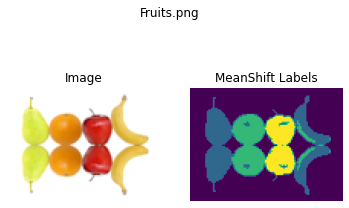

In [5]:
# Specify path to the test image
img_path = 'Fruits.png'

# Read image
img = Image.open(img_path)
img.thumbnail(size)

# Apply MeanShift algorithm to the image
img_tmp = img.copy()
ms_labels = apply_meanshift(img_tmp)
# Read and plot the original image and MeanShift result
img = np.array(img)# change here

plot_two_images(img_path, img, "Image", ms_labels, "MeanShift Labels")

### Q2. Use Watershed transformation for image segmentation

processing watershed


/var/folders/mt/3kff21w94glbph1s0frdcqq40000gn/T/ipykernel_24447/230823119.py:31: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance, footprint=np.ones((30, 30)), indices=False, num_peaks_per_label=1)


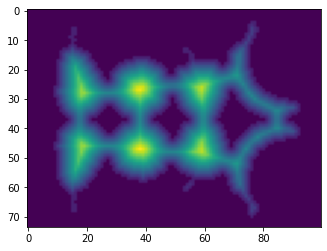

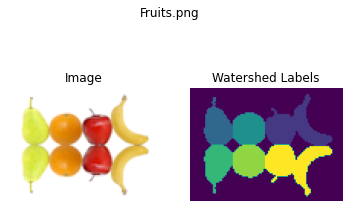

In [6]:
# Read image from img_path as specified above
img = Image.open(img_path)
img.thumbnail(size)

# Apply Watershed algorithm (remember to plot distance transform as well)
ws_labels, distance = apply_watershed(img, 250, True, False)# Change here

# Read the original image
img = np.array(img)# change here

plot_two_images(img_path, img, "Image", ws_labels, "Watershed Labels")

### Q3. Compare MeanShift and Watershed segmentation results

Not finished.

processing meanshift
processing meanshift
processing meanshift
processing meanshift
processing meanshift
processing meanshift
processing meanshift
processing meanshift
processing watershed
processing watershed
processing watershed
processing watershed
processing watershed
processing watershed
processing watershed
processing watershed


/var/folders/mt/3kff21w94glbph1s0frdcqq40000gn/T/ipykernel_24447/230823119.py:31: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance, footprint=np.ones((30, 30)), indices=False, num_peaks_per_label=1)


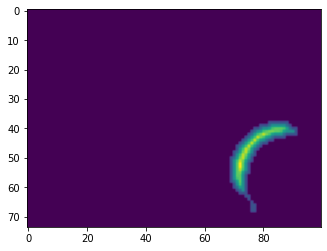

In [7]:
# List of MaskX.png images
MaskX = ['Mask{}.png'.format(str(idx)) for idx in range(1,9)]
img_MaskX = []
for mask in MaskX:
    mask_tmp = Image.open(mask)
    mask_tmp.thumbnail(size)
    mask_rgb = mask_tmp.convert('RGB')
    img_MaskX.append(mask_rgb)
MaskX_tmp = img_MaskX.copy()

# Generate list of unique MeanShift labels and corresponding label image masks
lbl_ms_unique = np.unique(ms_labels)
ms_masks = []
for mask in MaskX_tmp:
    ms_mask = apply_meanshift(mask)
    ms_masks.append(ms_mask)
# ms_masks = apply_meanshift(for mask in MaskX)

# Generate list of unique Watershed labels and corresponding label image masks
# Hint: Make sure you have generated reasonable watershed segmentation results
lbl_ws_unique = np.unique(ws_labels)
ws_masks = []
for mask in MaskX_tmp:
    plt.imshow(mask)
    ws_mask, distance_mask = apply_watershed(mask, 250, True, True)
    ws_masks.append(ws_mask)
# ws_masks =

ms_DSCs = []
ws_DSCs = []
n = 0
# Iterate over MaskX.png images and calculate DSC
for each_maskx_image in MaskX:
    # Read each MaskX.png image
    im1 = Image.open(each_maskx_image)
    im1.thumbnail(size)
    im1_binary = im1.point(lambda x: 1 if x != 0 else 0, '1')
    im1_array = np.array(im1_binary)
    
    # Check DSC for each MeanShift label
    # masks all have same sequence in different lsit
    # Union is FP+TP+FN 
    # Intersection is TP
    # Therefore, DSC = 2TP/(FP+2TP+FN) = 2TP/(FP+TP+FN + TP) = 2Intersection/(Union+Intersection)
    union = np.logical_or(ms_masks[n], im1_array)
    intersection = np.logical_and(ms_masks[n], im1_array)
    ms_DSC = (2 * np.sum(intersection)) / (np.sum(union) + np.sum(intersection))
    ms_DSCs.append(ms_DSC)
    
    # Check DSC for each Watershed label
    union = np.logical_or(ws_masks[n], im1_array)
    intersection = np.logical_and(ws_masks[n], im1_array)
    ws_DSC = (2 * np.sum(intersection)) / (np.sum(union) + np.sum(intersection))
    ws_DSCs.append(ws_DSC)
    
    n = n + 1

In [15]:
avg_ms = mean(ms_DSCs)
avg_ws = mean(ws_DSCs)
print(avg_ms)
print(avg_ws)

0.9816942831883624
0.8349279676194125


In [8]:
print(ms_DSCs)
print(ws_DSCs)

[0.972568578553616, 0.9938949938949939, 0.9761273209549072, 0.9871244635193133, 0.9692496924969249, 0.9779411764705882, 0.9881422924901185, 0.9885057471264368]
[0.8507670850767085, 0.8834688346883469, 0.849478390461997, 0.7578947368421053, 0.8473177441540578, 0.8744939271255061, 0.8554396423248882, 0.7605633802816901]


DSC     | MeanShift         | Watershed

Mask1   |0.972568578553616  |0.8507670850767085

Mask2   |0.9938949938949939 |0.8834688346883469

Mask3   |0.9761273209549072 |0.849478390461997

Mask4   |0.9871244635193133 |0.7578947368421053

Mask5   |0.9692496924969249 |0.8473177441540578

Mask6   |0.9779411764705882 |0.8744939271255061

Mask7   |0.9881422924901185 |0.8554396423248882

Mask8   |0.9885057471264368 |0.7605633802816901

Average |0.9816942831883624 |0.8349279676194125

From above 'table', it is clear to see that Meanshift perform better than Watershed. I suppose that it is because in the process of Watershed method, there are plenty of complicated preprocessing, and we should adjust parameters in order to get the best performance. From the result, obviously I have not found the best parameters for Watershed method, this leads to the performance of Watershed is much worse than Meanshift.
As for the preprocessing, I think I should have more attempts in footprint, threshold, as well as the size of image.